In [9]:
from vierlinden.config import model_output_path
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper
from vierlinden.model.model import NHiTSPredictionWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE

seed = 42

context_length = 50
prediction_length = 10
batch_size = 32
num_workers = 18

def main(arg : str):
    dp = VierlindenDataProcessor()
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, arg)
    
    training_df, test_df = dp.split_data(df)
    
    nhits_wrapper = NHiTSTrainingWrapper(training_df, 
                                         target_col = arg, 
                                         context_length = context_length, 
                                         prediction_length = prediction_length,
                                         batch_size = batch_size, 
                                         num_workers = num_workers)
    optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)
    
    print(f"Optimal learning rate for {arg}: {optimal_lr}")
    
    best_model = nhits_wrapper.train(optimal_lr, loss = MASE(), seed = seed)
    
    return nhits_wrapper, test_df

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


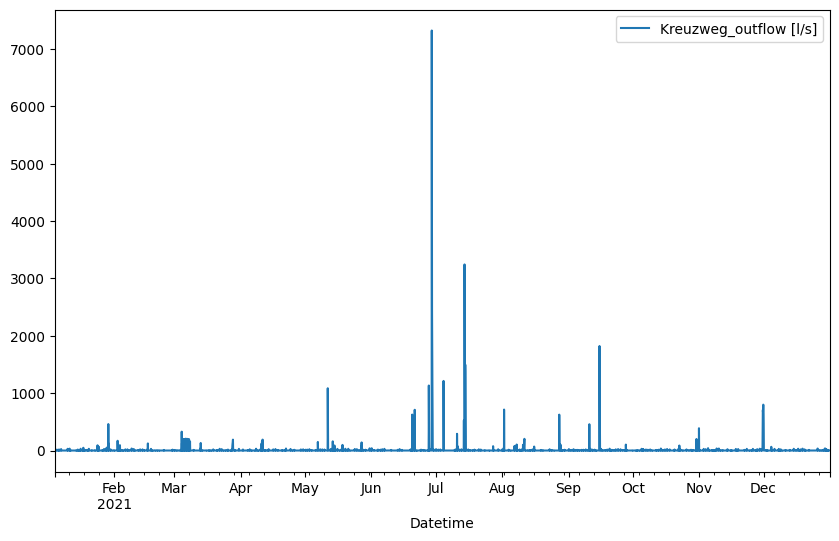

In [10]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')
dp.plot_target_col('Kreuzweg_outflow [l/s]')

In [11]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')

training_df, test_df = VierlindenDataProcessor.split_data(df, train_frac=0.9)
test_df.shape

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.


INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


(868, 24)

In [12]:
nhits_wrapper, test_df = main('Kreuzweg_outflow [l/s]')
nhits_wrapper.save_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model.pt')

model = nhits_wrapper.best_model

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.


INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
Finding best initial lr: 100%|██████████| 100/100 [00:01<00:00, 70.50it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.

  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | MASE           | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated model params size (MB)


Optimal learning rate for Kreuzweg_outflow [l/s]: 0.00012589254117941672
Epoch 0: 100%|██████████| 193/193 [00:25<00:00,  7.59it/s, v_num=0, train_loss_step=1.530, val_loss=1.500, train_loss_epoch=1.720]

Metric val_loss improved. New best score: 1.501


Epoch 1: 100%|██████████| 193/193 [00:28<00:00,  6.73it/s, v_num=0, train_loss_step=1.020, val_loss=1.420, train_loss_epoch=1.610]

Metric val_loss improved by 0.083 >= min_delta = 0.0001. New best score: 1.418


Epoch 2: 100%|██████████| 193/193 [00:24<00:00,  7.97it/s, v_num=0, train_loss_step=2.610, val_loss=1.380, train_loss_epoch=1.550]

Metric val_loss improved by 0.039 >= min_delta = 0.0001. New best score: 1.379


Epoch 3: 100%|██████████| 193/193 [00:23<00:00,  8.10it/s, v_num=0, train_loss_step=1.350, val_loss=1.350, train_loss_epoch=1.520]

Metric val_loss improved by 0.030 >= min_delta = 0.0001. New best score: 1.349


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, val_loss=1.350, train_loss_epoch=1.520]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 4: 100%|██████████| 193/193 [00:23<00:00,  8.17it/s, v_num=0, train_loss_step=1.070, val_loss=1.330, train_loss_epoch=1.480]

Metric val_loss improved by 0.020 >= min_delta = 0.0001. New best score: 1.329


Epoch 5: 100%|██████████| 193/193 [00:26<00:00,  7.35it/s, v_num=0, train_loss_step=0.910, val_loss=1.300, train_loss_epoch=1.460]

Metric val_loss improved by 0.027 >= min_delta = 0.0001. New best score: 1.302


Epoch 6: 100%|██████████| 193/193 [00:24<00:00,  7.96it/s, v_num=0, train_loss_step=1.180, val_loss=1.280, train_loss_epoch=1.430]

Metric val_loss improved by 0.019 >= min_delta = 0.0001. New best score: 1.284


Epoch 7: 100%|██████████| 193/193 [00:27<00:00,  7.11it/s, v_num=0, train_loss_step=2.000, val_loss=1.240, train_loss_epoch=1.390]

Metric val_loss improved by 0.043 >= min_delta = 0.0001. New best score: 1.241


Epoch 8: 100%|██████████| 193/193 [00:23<00:00,  8.10it/s, v_num=0, train_loss_step=1.360, val_loss=1.190, train_loss_epoch=1.350]

Metric val_loss improved by 0.047 >= min_delta = 0.0001. New best score: 1.193


Epoch 9: 100%|██████████| 193/193 [00:28<00:00,  6.69it/s, v_num=0, train_loss_step=1.330, val_loss=1.110, train_loss_epoch=1.290]

Metric val_loss improved by 0.081 >= min_delta = 0.0001. New best score: 1.112


Epoch 10: 100%|██████████| 193/193 [00:31<00:00,  6.15it/s, v_num=0, train_loss_step=0.636, val_loss=1.020, train_loss_epoch=1.200]

Metric val_loss improved by 0.092 >= min_delta = 0.0001. New best score: 1.020


Epoch 11: 100%|██████████| 193/193 [00:32<00:00,  5.96it/s, v_num=0, train_loss_step=1.470, val_loss=0.974, train_loss_epoch=1.150]

Metric val_loss improved by 0.045 >= min_delta = 0.0001. New best score: 0.974


Epoch 12: 100%|██████████| 193/193 [00:24<00:00,  7.74it/s, v_num=0, train_loss_step=0.678, val_loss=0.915, train_loss_epoch=1.100]

Metric val_loss improved by 0.059 >= min_delta = 0.0001. New best score: 0.915


Epoch 13: 100%|██████████| 193/193 [00:26<00:00,  7.15it/s, v_num=0, train_loss_step=1.270, val_loss=0.867, train_loss_epoch=1.050]

Metric val_loss improved by 0.048 >= min_delta = 0.0001. New best score: 0.867


Epoch 14: 100%|██████████| 193/193 [00:29<00:00,  6.49it/s, v_num=0, train_loss_step=0.956, val_loss=0.844, train_loss_epoch=1.010]

Metric val_loss improved by 0.023 >= min_delta = 0.0001. New best score: 0.844


Epoch 15: 100%|██████████| 193/193 [00:27<00:00,  7.09it/s, v_num=0, train_loss_step=0.740, val_loss=0.823, train_loss_epoch=0.989]

Metric val_loss improved by 0.020 >= min_delta = 0.0001. New best score: 0.823


Epoch 16: 100%|██████████| 193/193 [00:28<00:00,  6.81it/s, v_num=0, train_loss_step=0.666, val_loss=0.821, train_loss_epoch=0.977]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.821


Epoch 17: 100%|██████████| 193/193 [00:28<00:00,  6.71it/s, v_num=0, train_loss_step=0.921, val_loss=0.812, train_loss_epoch=0.969]

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 0.812


Epoch 18: 100%|██████████| 193/193 [00:35<00:00,  5.37it/s, v_num=0, train_loss_step=0.934, val_loss=0.809, train_loss_epoch=0.959]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.809


Epoch 19: 100%|██████████| 193/193 [00:27<00:00,  6.97it/s, v_num=0, train_loss_step=0.475, val_loss=0.799, train_loss_epoch=0.951]

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 0.799


Epoch 20: 100%|██████████| 193/193 [00:25<00:00,  7.61it/s, v_num=0, train_loss_step=0.895, val_loss=0.793, train_loss_epoch=0.941]

Metric val_loss improved by 0.006 >= min_delta = 0.0001. New best score: 0.793


Epoch 21: 100%|██████████| 193/193 [00:28<00:00,  6.75it/s, v_num=0, train_loss_step=0.893, val_loss=0.784, train_loss_epoch=0.934]

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 0.784


Epoch 22: 100%|██████████| 193/193 [00:38<00:00,  4.99it/s, v_num=0, train_loss_step=1.100, val_loss=0.782, train_loss_epoch=0.926]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.782


Epoch 23: 100%|██████████| 193/193 [00:26<00:00,  7.25it/s, v_num=0, train_loss_step=1.080, val_loss=0.780, train_loss_epoch=0.923]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.780


Epoch 24: 100%|██████████| 193/193 [00:25<00:00,  7.57it/s, v_num=0, train_loss_step=0.615, val_loss=0.773, train_loss_epoch=0.915]

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 0.773


Epoch 25: 100%|██████████| 193/193 [00:26<00:00,  7.34it/s, v_num=0, train_loss_step=1.230, val_loss=0.770, train_loss_epoch=0.908]

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 0.770


Epoch 26: 100%|██████████| 193/193 [00:26<00:00,  7.15it/s, v_num=0, train_loss_step=0.687, val_loss=0.770, train_loss_epoch=0.906]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.770


Epoch 27: 100%|██████████| 193/193 [00:30<00:00,  6.41it/s, v_num=0, train_loss_step=0.477, val_loss=0.762, train_loss_epoch=0.898]

Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 0.762


Epoch 29: 100%|██████████| 193/193 [00:30<00:00,  6.28it/s, v_num=0, train_loss_step=1.610, val_loss=0.758, train_loss_epoch=0.890]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.758


Epoch 30: 100%|██████████| 193/193 [00:29<00:00,  6.51it/s, v_num=0, train_loss_step=0.878, val_loss=0.754, train_loss_epoch=0.886]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.754


Epoch 31: 100%|██████████| 193/193 [00:29<00:00,  6.52it/s, v_num=0, train_loss_step=0.916, val_loss=0.752, train_loss_epoch=0.882]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.752


Epoch 32: 100%|██████████| 193/193 [00:27<00:00,  7.03it/s, v_num=0, train_loss_step=0.636, val_loss=0.747, train_loss_epoch=0.876]

Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 0.747


Epoch 34: 100%|██████████| 193/193 [00:30<00:00,  6.39it/s, v_num=0, train_loss_step=0.678, val_loss=0.745, train_loss_epoch=0.873]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.745


Epoch 38: 100%|██████████| 193/193 [00:32<00:00,  5.96it/s, v_num=0, train_loss_step=1.490, val_loss=0.742, train_loss_epoch=0.856]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.742


Epoch 39: 100%|██████████| 193/193 [00:31<00:00,  6.17it/s, v_num=0, train_loss_step=0.629, val_loss=0.737, train_loss_epoch=0.855]

Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 0.737


Epoch 40: 100%|██████████| 193/193 [00:30<00:00,  6.37it/s, v_num=0, train_loss_step=1.020, val_loss=0.733, train_loss_epoch=0.850]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.733


Epoch 46: 100%|██████████| 193/193 [00:30<00:00,  6.24it/s, v_num=0, train_loss_step=0.918, val_loss=0.725, train_loss_epoch=0.836]

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 0.725


Epoch 52: 100%|██████████| 193/193 [00:30<00:00,  6.26it/s, v_num=0, train_loss_step=1.180, val_loss=0.724, train_loss_epoch=0.832]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.724


Epoch 54: 100%|██████████| 193/193 [00:44<00:00,  4.34it/s, v_num=0, train_loss_step=0.614, val_loss=0.721, train_loss_epoch=0.826]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.721


Epoch 58: 100%|██████████| 193/193 [00:33<00:00,  5.68it/s, v_num=0, train_loss_step=1.060, val_loss=0.717, train_loss_epoch=0.823]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 0.717


Epoch 61: 100%|██████████| 193/193 [00:32<00:00,  6.00it/s, v_num=0, train_loss_step=0.476, val_loss=0.716, train_loss_epoch=0.818]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.716


Epoch 71: 100%|██████████| 193/193 [00:37<00:00,  5.10it/s, v_num=0, train_loss_step=0.819, val_loss=0.723, train_loss_epoch=0.812]

Monitored metric val_loss did not improve in the last 10 records. Best score: 0.716. Signaling Trainer to stop.


Epoch 71: 100%|██████████| 193/193 [00:38<00:00,  5.05it/s, v_num=0, train_loss_step=0.819, val_loss=0.723, train_loss_epoch=0.812]


INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


[1.7243181467056274, 1.6056596040725708, 1.5509430170059204, 1.5191465616226196, 1.4832642078399658, 1.4570257663726807, 1.432214617729187, 1.3942123651504517, 1.3480528593063354, 1.2902673482894897, 1.203602910041809, 1.1523816585540771, 1.09544837474823, 1.0476893186569214, 1.0111349821090698, 0.9893050193786621, 0.9773569703102112, 0.9694897532463074, 0.9594452381134033, 0.9508267045021057, 0.9413313865661621, 0.933534562587738, 0.9257288575172424, 0.9229271411895752, 0.9152666926383972, 0.9077327251434326, 0.905504584312439, 0.8981841802597046, 0.8914492726325989, 0.8897739052772522, 0.8855524659156799, 0.8824446201324463, 0.8764294981956482, 0.8741602897644043, 0.8728430271148682, 0.8676872253417969, 0.8629993796348572, 0.8609297275543213, 0.8563690781593323, 0.8552462458610535, 0.8504226803779602, 0.8489598035812378, 0.8459743857383728, 0.8454427719116211, 0.8456466197967529, 0.8432725667953491, 0.8362743854522705, 0.8413577079772949, 0.8358118534088135, 0.8350363373756409, 0.833

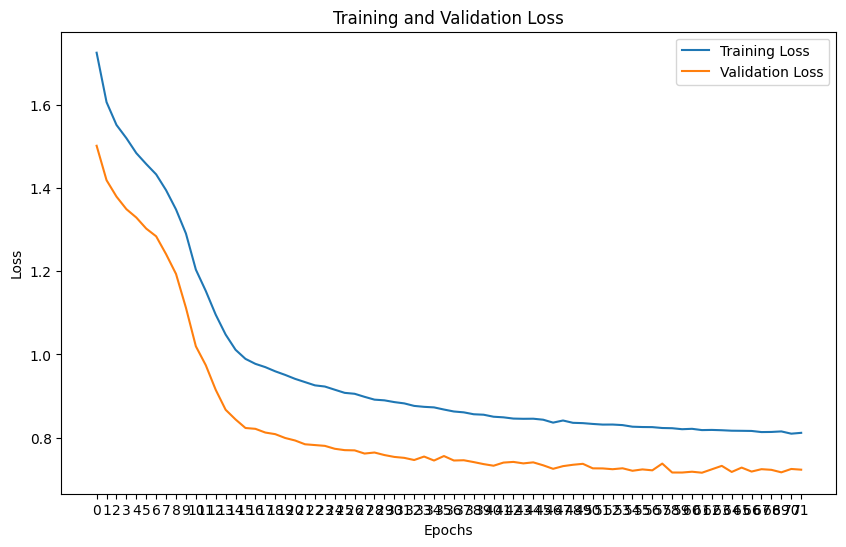

In [13]:
print(nhits_wrapper.metrics_callback.metrics["train_loss"])
print(nhits_wrapper.metrics_callback.metrics["val_loss"])

nhits_wrapper.plot_training_result()

In [3]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model_mase.pt')

In [14]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kreuzweg_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


In [15]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kreuzweg_outflow [l/s],Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,0.000000,"[-0.0166168212890625, 0.0001392364501953125, -..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,0.000000,"[-0.0029697418212890625, 0.019370079040527344,..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,0.000000,"[-1.5974044799804688e-05, 0.008974313735961914..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,80.327074,"[-0.03258633613586426, 0.0021522045135498047, ..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,337.788898,"[6.872893333435059, 4.611355304718018, 3.94871..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,519.748537,"[31.599939346313477, 20.17141342163086, 16.370..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,654.730181,"[65.69389343261719, 33.706398010253906, 26.271..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,709.151111,"[101.20944213867188, 44.986488342285156, 33.03..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,669.507342,"[142.61245727539062, 61.41664123535156, 46.929..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,725.439406,"[158.35769653320312, 65.24545288085938, 49.053..."


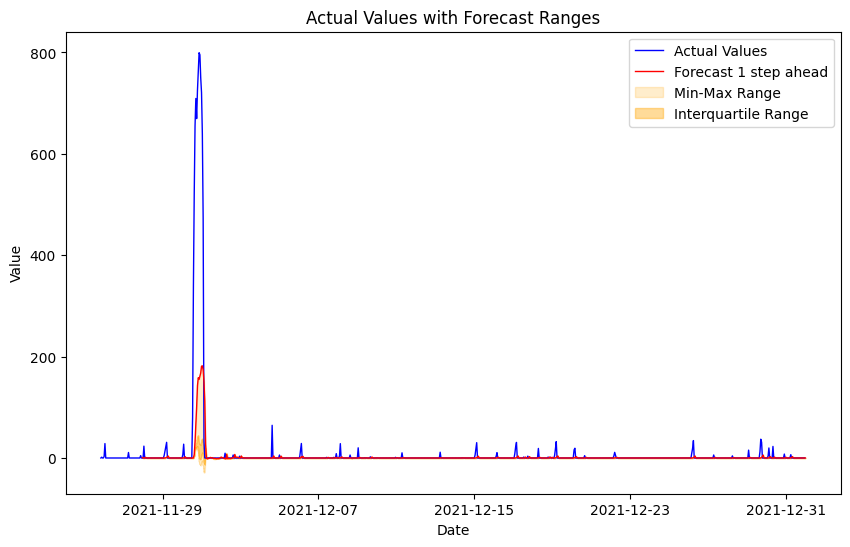

In [16]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

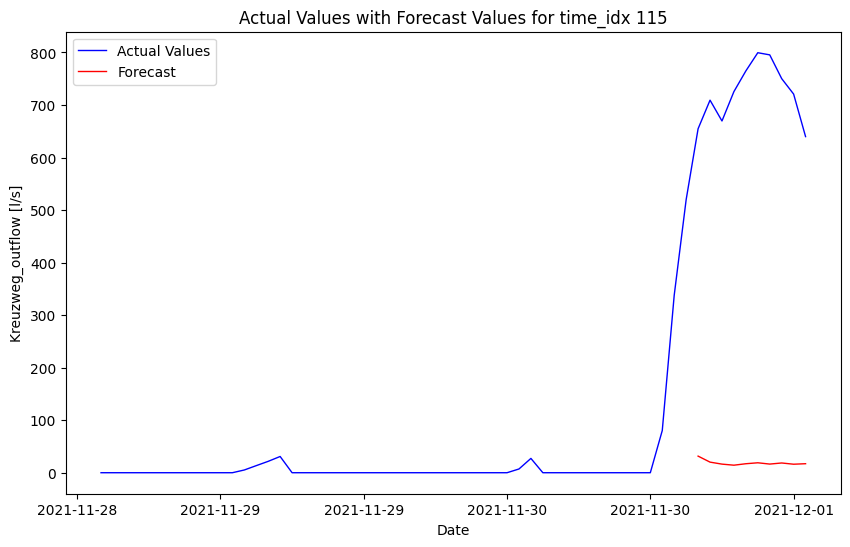

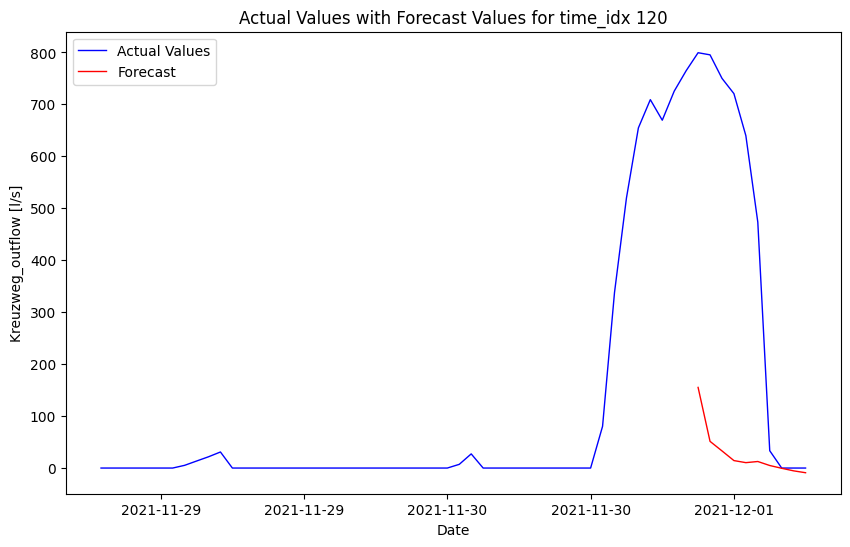

In [18]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)

In [12]:
print(model)

NHiTS(
  	"activation":                        ReLU
  	"backcast_loss_ratio":               1.0
  	"batch_normalization":               False
  	"categorical_groups":                {}
  	"context_length":                    50
  	"downsample_frequencies":            [8, 2, 1]
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_size":                       512
  	"initialization":                    lecun_normal
  	"interpolation_mode":                linear
  	"learning_rate":                     0.00012589254117941672
  	"log_gradient_flow":                 False
  	"log_interval":                      5
  	"log_val_interval":                  1
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                              MAE()
  	"monotone_constaints"